In [2]:
import numpy as np
import graph_tool.all as gt

In [3]:
X = np.random.uniform(0,1,(100,2))

In [4]:
def create_gg(X):
    n = X.shape[0]
    edges = []
    for i in range(n):
        for j in range(i):
            midpoint = (X[i]+X[j])/2 
            r = np.linalg.norm(X[i]-X[j])/2
            for k in range(n):
                if np.linalg.norm(midpoint-X[k]) < r:
                    break 
            else:
                edges.append((i,j))
    G = gt.Graph(directed=False)
    G.add_edge_list(edges)
    return G


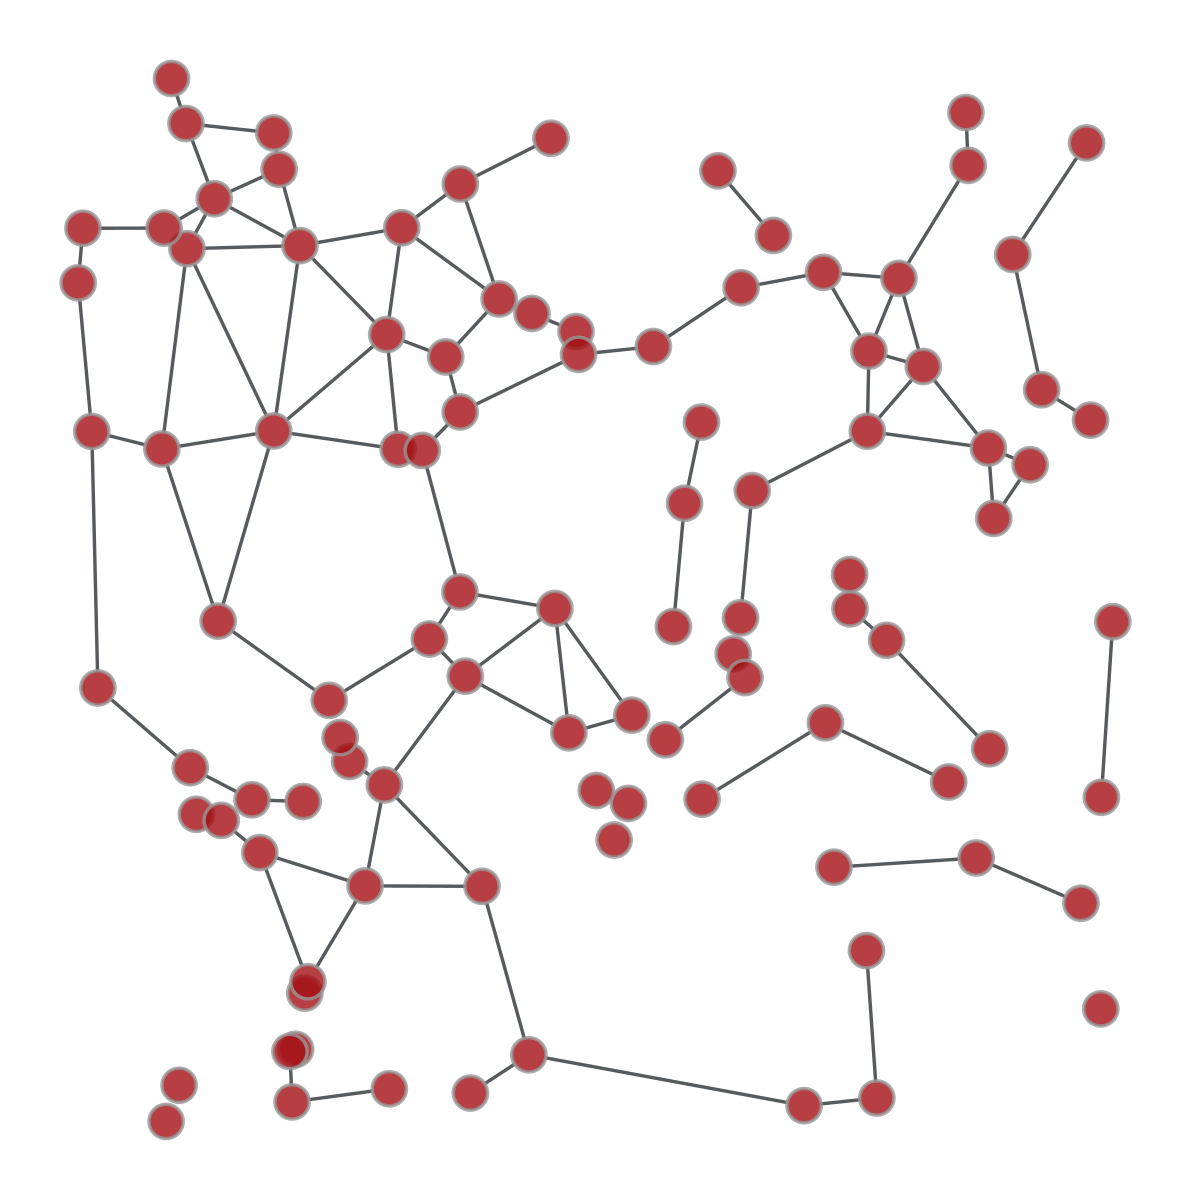

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb7dc7a79d0, at 0x7fb74d36b8e0>

In [5]:
G = create_gg(X)
pos = G.new_vp('vector<float>')
pos.set_2d_array(X.T)

gt.graph_draw(G,pos=pos)

In [6]:
import random 

In [93]:
def block_model(n=500,lam=10,num_blocks=10):
    def prob(a, b):

       if a == b:

           return 0.999

       else:

           return 0.001
    G, bm = gt.random_graph(n, lambda: np.random.poisson(lam=lam), directed=False,

                            model="blockmodel",

                            block_membership=lambda: random.randint(0,num_blocks-1),

                            edge_probs=prob)
    for i,d in enumerate(G.get_total_degrees(G.get_vertices())):
        if d == 0:
            G.add_edge(i,1)
    return G,bm

In [82]:
def make_path_graph(Gs):
    H = gt.Graph(directed=False)
    sizes = [0]
    for g in Gs:
        H = gt.graph_union(H,g)
        sizes.append(H.num_vertices())
    
    for i in range(len(sizes)):
        if i == 0 or i == len(sizes)-1: continue 
        for _ in range(1):
            a = random.randint(sizes[i-1], sizes[i])
            b = random.randint(sizes[i], sizes[i+1])
            H.add_edge(a,b)

    return H

In [19]:
G = gt.lattice([10,10])
G2 = gt.lattice([5,20])
G3 = gt.complete_graph(25)
G4 = gt.load_graph("graphs/block_model_300.dot")
H = gt.Graph(directed=False)

graphs = [G4, G4, G4 ,G4]

H = make_path_graph(graphs)
    

In [20]:
import s_gd2
I = [e1 for e1,_ in H.iter_edges()]
J = [e2 for _,e2 in H.iter_edges()]

In [94]:
Gs = list()
for i in range(15):
    if random.random() > 0.5:
        Gs.append(gt.lattice([4,4]))
    else:
        Gs.append(block_model(n=50,lam=5,num_blocks=2)[0])
H = make_path_graph(Gs)

In [95]:
from resist import get_tsnet_layout 
from modules import distance_matrix
from modules import L2G

d = distance_matrix.get_distance_matrix(H,'spdm')
X = L2G.L2G(d,weighted=False).solve(20)


0.00025195263290501383


In [96]:
pos = H.new_vp('vector<float>')
pos.set_2d_array(X.T)

gt.graph_draw(H,pos=pos,output="test-mds.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb6dc6ea050, at 0x7fb6dc0139a0>

In [97]:
X = get_tsnet_layout(d,'test',40)

Input graph: test,
Finding sigmas... Iteration 50/50: Perplexities in [40.0000, 40.0000]..
Done. Perplexities in [40.0000, 40.0000].
Epoch: 804. Cost: 0.138180. Max step size of last 40: 9.99e-08
Auto-switching at epoch 803
Epoch: 1593. Cost: 0.194090. Max step size of last 40: 9.96e-08
Auto-stopping at epoch 1592


In [98]:
pos = H.new_vp('vector<float>')
pos.set_2d_array(X.T)

gt.graph_draw(H,pos=pos,output="test-tsnet.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb6dc6ea050, at 0x7fb6da82f190>

In [99]:
w = L2G.get_w(H,k=10,a=2)
X = L2G.L2G(d,w=w).solve(100)

pos = H.new_vp('vector<float>')
pos.set_2d_array(X.T)

gt.graph_draw(H,pos=pos,output="test-l2g-small.pdf")

0.00025195263290501383


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb6dc6ea050, at 0x7fb6da848400>

In [102]:
w = L2G.get_w(H,k=50,a=7)
X = L2G.L2G(d,w=w).solve(100)

pos = H.new_vp('vector<float>')
pos.set_2d_array(X.T)

gt.graph_draw(H,pos=pos,output="test-l2g.pdf")

0.00025195263290501383


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb6dc6ea050, at 0x7fb6da82e4d0>

In [107]:
import pandas as pd
data = pd.read_csv("palmerpenguins.csv")


labels, index_map = pd.factorize(data['species'])


gender_map = {'male': 0, 'female': 1}
marker_map = {0: "^", 1: "o"}
markers,ind_map = pd.factorize(data["sex"])
male = np.where(markers == 0)
female = np.where(markers == 1)

cmap = {0: "red", 
        1: "blue",
        2: "orange",
        3: "tab:red",
        4: "tab:purple"}

C = np.array([cmap[c] for c in labels])

In [108]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [105]:
from resist import get_neighborhood, get_stress

In [106]:
d = distance_matrix.get_distance_matrix(H,'spdm')
d_norm = distance_matrix.get_distance_matrix(H,'spdm',normalize=False)

scores = np.array([[0,0] for _ in np.linspace(0,1,10)])

for i,a in enumerate(np.linspace(0,1,10)):
    X = get_tsnet_layout(d,'watts',interpolate=True,a=a)
    
    scores[i][0] = get_neighborhood(X,d_norm)
    scores[i][1] = get_stress(X,d)
    
    pos = H.new_vp('vector<float>')
    pos.set_2d_array(X.T)

    gt.graph_draw(H,pos,output=f"drawings/interpolate_test_2_{a}.pdf")   

Input graph: watts,
Finding sigmas... Iteration 50/50: Perplexities in [30.0000, 30.0000]..
Done. Perplexities in [30.0000, 30.0000].
Epoch: 2000. Cost: 0.117262. Max step size of last 40: 6.29e-07
Input graph: watts,
Finding sigmas... Iteration 50/50: Perplexities in [30.0000, 30.0000]..
Done. Perplexities in [30.0000, 30.0000].
Epoch: 2000. Cost: 1.028549. Max step size of last 40: 1.83e-06
Input graph: watts,
Finding sigmas... Iteration 50/50: Perplexities in [30.0000, 30.0000]..
Done. Perplexities in [30.0000, 30.0000].
Epoch: 608. Cost: 0.979145. Max step size of last 40: 9.86e-08
Auto-switching at epoch 607
Epoch: 2000. Cost: 1.104207. Max step size of last 40: 1.55e-07
Input graph: watts,
Finding sigmas... Iteration 50/50: Perplexities in [30.0000, 30.0000]..
Done. Perplexities in [30.0000, 30.0000].
Epoch: 2000. Cost: 1.044323. Max step size of last 40: 2.41e-07
Input graph: watts,
Finding sigmas... Iteration 50/50: Perplexities in [30.0000, 30.0000]..
Done. Perplexities in [30

In [109]:
import pylab 

NE_scores = scores[:,0]
stress_scores = scores[:,1]
print(NE_scores)

[0 0 0 0 0 0 0 0 0 0]
